prepare library

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

references:
- https://towardsdatascience.com/community-detection-algorithms-9bd8951e7dae
- https://medium.com/@marcosacj/creating-and-visualizing-a-complex-network-of-instagram-hashtags-based-on-posts-about-politics-2daf24f31088
- https://github.com/marcosacj/cna-instagram/blob/master/2019-06-11-1-macj-graph-scratch.ipynb <-- coding contoh pembagian nodes & edges
- https://www.kaggle.com/datasets/arunavakrchakraborty/covid19-twitter-dataset

In [305]:
link_folder = 'write your dataset path here'

setting dataset files

In [306]:
df = pd.read_csv( link_folder+'Covid-19 Twitter Dataset (Apr-Jun 2020).csv' )
# df = pd.read_csv( link_folder+'Covid-19 Twitter Dataset (Apr-Jun 2021).csv' )

# # check unique values from attributes from df
# print( "Unique values from category column: ", sorted( df['hashtags'].unique() ), ", count: ", df['hashtags'].nunique() )

# preview data from file
# df.head()
# df.info()

lets make new columns to divide hashtags and shortening the source column value

In [307]:
# filter data based on hashtags and source value
filtered_df = df.dropna( subset=['hashtags', 'source' ] ).copy()

# create new columns
filtered_df['shorten_source'] = filtered_df['source'].copy()

# rearrange columns
filtered_df = filtered_df[ ['id', 'created_at', 'source', 'shorten_source', 'lang', 'original_text', 'favorite_count', 'retweet_count', 'original_author', 'hashtags', 'user_mentions', 'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'] ]

# preview filtered data
print( "origin data number: ", df.shape )
print( "filtered data number: ", filtered_df.shape )

origin data number:  (143903, 17)
filtered data number:  (28500, 18)


In [308]:
filtered_df.sample( 5 )

,id,created_at,source,shorten_source,lang,original_text,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
103261,1.260000e+18,2020-05-22,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...",en,RT @ShahanOmer: #PoliceBrutality in Adana Turk...,3.0,0.0,RebekkaMaria3,PoliceBrutality,ShahanOmer,NaN,adana turkey muslim beaten arrest pray tarawih...,-0.4404,0.335,0.516,0.148,neg
137500,1.270000e+18,2020-06-12,"<a href=""https://mobile.twitter.com"" rel=""nofo...","<a href=""https://mobile.twitter.com"" rel=""nofo...",en,RT @PaulBrandITV: Health Minister Edward Argar...,0.0,30.0,NEILCOL38531099,covid19,PaulBrandITV,NaN,health minist edward argar deni patient discha...,0.5423,0.000,0.667,0.333,pos
78597,1.260000e+18,2020-05-11,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...","<a href=""https://buffer.com"" rel=""nofollow"">Bu...",en,Watch: Desi 'Jugaad' Helps India Fight #COVID-...,1.0,0.0,thebetterindia,COVID,NaN,India,watch desi jugaad help india fight rickshaw dr...,0.0258,0.160,0.675,0.166,pos
12624,1.250000e+18,2020-04-25,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...",en,"RT @sigg20: Total Class,a Beloved New York Spo...",0.0,137.0,ArdelioValdes,COVID19,sigg20,NaN,total class belov new york sport hero give dai...,0.6808,0.119,0.550,0.330,pos
76951,1.260000e+18,2020-05-10,"<a href=""http://twitter.com/download/android"" ...","<a href=""http://twitter.com/download/android"" ...",en,RT @D_jeneration: Failure to protect and preve...,0.0,1068.0,rosethornne,TrumpGate,D_jeneration,"Florida, USA",failur protect prevent american die covid19,-0.2960,0.368,0.283,0.349,neg


In [309]:
def remove_delimiter_from_source_link( input_text ):
    curr_values = str( input_text ).split( ">" )
    curr_values = curr_values[ 1 ].split( "<" )
    return curr_values[0]
# end func

# # test function by using unique values from all data
# list_sources_values = filtered_df['source'].unique().copy()
# list_sources_values = [ remove_delimiter_from_source_link( val ) for val in list_sources_values ]
# print( "len filtered source: ", len( list_sources_values ) )
# list_sources_values

# get string value only from source value
filtered_df['shorten_source'] = [ remove_delimiter_from_source_link( val ) for val in filtered_df['source'] ]

# check current dataframe values
filtered_df.sample( 5 )

,id,created_at,source,shorten_source,lang,original_text,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
82789,1.260000e+18,2020-05-12,"<a href=""https://www.hootsuite.com"" rel=""nofol...",Hootsuite Inc.,en,The 🇪🇸#Spanish MoD is conducting studies with ...,0.0,19.0,ShephardNews,"Spanish, COVID_19, Coronavirus",NaN,NaN,mod conduct studi industri analys impact,0.0000,0.0,1.000,0.000,neu
17390,1.250000e+18,2020-04-27,"<a href=""https://sproutsocial.com"" rel=""nofoll...",Sprout Social,en,[ICYMI] WATCH: Speaking to #CNBCAfrica’s @Fifi...,0.0,0.0,cnbcafrica,CNBCAfrica,"FifiPeters, OldMutualSA",Africa,icymi watch speak ceo iain williamson provid u...,0.0000,0.0,1.000,0.000,neu
92751,1.260000e+18,2020-05-15,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,en,RT @UPCWGS: Meet our panelists for this Saturd...,0.0,278.0,_deleonclaire,IDAHOTB,UPCWGS,NaN,meet panelist saturday twitter discuss join tw...,0.2960,0.0,0.833,0.167,pos
123668,1.270000e+18,2020-05-27,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android,en,"RT @iSKsCombat_: Daily wage earners, are among...",0.0,97.0,sjkamble25,Covid_19,iSKsCombat_,"Aurangabad, Maharashtra",daili wage earner among sever hit due crisi in...,0.0000,0.0,1.000,0.000,neu
91777,1.260000e+18,2020-05-15,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android,en,RT @NCineas: Thank you @IcahnMountSinai for al...,0.0,4534.0,SaraGomezAranci,COVID19,"NCineas, IcahnMountSinai",NaN,thank allow nurs covid19 perspect share,0.6808,0.0,0.312,0.688,pos


In [310]:
# normalize hashtags value with lowercase
filtered_df['hashtags'] = filtered_df['hashtags'].str.lower()

# check current dataframe values
filtered_df.sample( 5 )

,id,created_at,source,shorten_source,lang,original_text,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
51308,1.260000e+18,2020-05-05,"<a href=""http://dynamicsignal.com/"" rel=""nofol...",Dynamic Signal,en,What critical actions should business leaders ...,0.0,0.0,JeffKearney,workforce,NaN,NaN,critic action busi leader take strategi look s...,-0.2732,0.231,0.769,0.0,neg
110551,1.260000e+18,2020-05-23,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,en,#TerroristCuomo’s responsible for more deaths ...,0.0,379.0,GunLiceN4Hrs,terroristcuomo,NaN,info@4hrCHL.com DaytonTX 77535,respons death covid19 counterpart,-0.5994,0.565,0.435,0.0,neg
76158,1.260000e+18,2020-05-10,"<a href=""http://twitter.com/#!/download/ipad"" ...",Twitter for iPad,en,RT @PublicHealthSD: We are reporting an outbre...,0.0,27.0,northmediation,covid19,PublicHealthSD,"Sudbury, Ontario",report outbreak finlandia villag nurs home cas...,0.0000,0.000,1.000,0.0,neu
32677,1.260000e+18,2020-05-01,"<a href=""https://about.twitter.com/products/tw...",TweetDeck,en,#Level4Regulations Mbalula: The measure we put...,0.0,82.0,FaizelPatel143,level4regulations,NaN,"Johannesburg, South Africa",mbalula measur put place mitig spread covid19,0.0000,0.000,1.000,0.0,neu
33010,1.260000e+18,2020-05-01,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,en,RT @EAA: AirVenture update: #OSH20 canceled du...,0.0,1.0,JetTipNet,osh20,EAA,"Burnsville, MN, USA",airventur updat cancel due covid19 fallout jac...,-0.2500,0.154,0.846,0.0,neg


In [311]:
# reference: https://www.geeksforgeeks.org/python-remove-non-english-characters-strings-from-list/

def is_english( c ):
    ascii_value = ord( c )
    return ( ascii_value >= 48 and ascii_value <= 57 ) or ( ascii_value >= 65 and ascii_value <= 90 ) or ( ascii_value >= 97 and ascii_value <= 122 ) or ascii_value==44 or ascii_value==32
# end func

def remove_non_english( word ):
    english_str = ""
    for one_char in word:
        if is_english( one_char ): english_str += one_char
    # end for

    # return final english string
    return english_str
# end func 

In [312]:
# search = 'पूछता_है_उपेक्षित_आयुर्वेद'
# # search = 'abcde'
# current_str = remove_non_english( search )
# print( 'current_str: ', current_str )
# # if remove_non_english( search )!="": print( "benar" )
# # else: print( "salah" )
# # df['fruit'].isin( fruits_to_check )

# # # filtered_df.loc[ search in filtered_df['hashtags'] ]
# # ( filtered_df['hashtags'].eq( search ) ).any()

# # print( "Unique values from category column: ", sorted( filtered_df['place'].unique() ), ", count: ", filtered_df['place'].nunique() )

In [313]:
# remove words that not writen in alphabet
def remove_words_not_written_in_eng_v1( hashtags_data ):
    # loop each posts hashtags
    for all_hashtags in hashtags_data:
        # split current post hashtags into individual hashtags
        one_posts_hash = all_hashtags.split( ", " )

        # loop tiap hashtags
        for idx, one_hash_tag in enumerate( one_posts_hash ):
            print( "idx: ", idx, ", hash: ", one_hash_tag )
            
            # hanya meloloskan hashtag yg disusun berdasarkan angka dan huruf alphabet, selain itu tidak diloloskan
            # if remove_non_english( hash )!="" and remove_non_english( hash )!=" ": all_hashtags[ idx ] = remove_non_english( hash )
            if remove_non_english( one_hash_tag )!="" and remove_non_english( one_hash_tag )!=" ":
                # print( "benar -->", remove_non_english( one_hash_tag ) )
                print( "benar -->", one_hash_tag )
            else:
                # one_posts_hash.remove( one_hash_tag )
                print( "salah -->", one_hash_tag )
            # end if else
        # end loop
    # end loop
# end func

# # remove words that not writen in alphabet
# remove_words_not_written_in_eng_v1( filtered_df['hashtags'] )


def remove_words_not_written_in_eng_v2( hashtags_data ):
    all_data = hashtags_data.copy()

    # loop each posts hashtags
    for index_post, all_hashtags in enumerate( all_data ):
        # split current post hashtags into individual hashtags
        one_posts_hash = all_hashtags.split( ", " )

        # loop tiap hashtags
        for idx, one_hash_tag in enumerate( one_posts_hash ):
            # print( "idx: ", idx, ", hash: ", one_hash_tag )
            
            # hanya meloloskan hashtag yg disusun berdasarkan angka dan huruf alphabet, selain itu tidak diloloskan
            if remove_non_english( one_hash_tag )=="" or remove_non_english( one_hash_tag )==" ": one_posts_hash.remove( one_posts_hash[ idx ] )
            # end if else
        # end loop

        # update current available hashtags
        # all_hashtags = ", ".join( one_posts_hash )
        all_data[ index_post ] = ", ".join( one_posts_hash )
    # end loop

    # return final results
    return all_data
# end func

def remove_words_not_written_in_eng_v3( posts_hash ):
    
    # split current post hashtags into individual hashtags
    one_posts_hash = posts_hash.split( ", " )
    
    # loop tiap hashtags
    for idx, one_hash_tag in enumerate( one_posts_hash ):
        # hanya meloloskan hashtag yg disusun berdasarkan angka dan huruf alphabet, selain itu tidak diloloskan
        if remove_non_english( one_hash_tag )=="" or remove_non_english( one_hash_tag )==" ": one_posts_hash.remove( one_posts_hash[ idx ] )

        # change short mark with another mark
        if 'ー' in one_hash_tag: one_hash_tag.replace( "ー", "-" )
        # end if else
    # end loop

    # return final results
    return ", ".join( one_posts_hash )
# end func

# filtered_df['hashtags'] = [ remove_words_not_written_in_eng_v3( val ) for val in filtered_df['hashtags'] ]
# filtered_df['hashtags']

In [314]:
# check current dataframe values
filtered_df.sample( 5 )

,id,created_at,source,shorten_source,lang,original_text,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
7543,1.250000e+18,2020-04-25,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android,en,RT @EuroLeague: .@Baskonia announces large don...,0.0,2.0,telepiman,"gameon, euroleagueunited","EuroLeague, Baskonia",Euskadi,announc larg donat covid19 fight,-0.3818,0.394,0.606,0.000,neg
86864,1.260000e+18,2020-05-13,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,en,Ah ha!!! Tweeting #FuelingtheFrontline provide...,0.0,145.0,Darth_Tweetious,fuelingthefrontline,NaN,"Newark, CA",ah ha tweet provid cup coffe hero take care co...,0.8481,0.000,0.432,0.568,pos
11085,1.250000e+18,2020-04-25,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android,en,RT @890Unknown: #Covid_19 #coronavirus #level4...,1.0,0.0,Ravindr31387925,"covid_19, coronavirus, level4lockdown, stayhom...",890Unknown,"भोपाल, भारत",full video click,0.0000,0.000,1.000,0.000,neu
118560,1.260000e+18,2020-05-25,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android,en,RT @UNDP: The health of our planet &amp; the w...,0.0,9035.0,Kenzytweets,"covid19, climateaction","UNDP, UNDPArabStates","Kampala, Uganda",health planet well peopl inextric link reveal,0.2732,0.000,0.741,0.259,pos
132198,1.270000e+18,2020-06-06,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android,en,RT @MadiiPTI: #DonatePlasma_SaveLives\nPlasma ...,0.0,2.0,littlespaaroww,donateplasma_savelives,"MadiiPTI, TeamISF_",NaN,plasma therapi safe effect sever covid19 patie...,0.4404,0.000,0.707,0.293,pos


In [315]:
hashtags_on_posts = filtered_df['hashtags'].unique().copy()
number_current_hastags_pairs = filtered_df['hashtags'].nunique()
# print( "all hashtags on posts: ", hashtags_on_posts )
print( "all hashtags number: ", number_current_hastags_pairs )

# get list of one hashtags from posts
def get_hashtags_list( posts ):
  # initial value
  final_list_tags = []
  final_list_posts = []

  # loop tiap satu data dari hashtags, misal limit dulu ke 1000 post
  for all_hashtags in posts:
    # divide hashtags into one list
    array_hashtags = all_hashtags.lower().split( ", " )

    # save current hastags list from one post
    final_list_posts.append( array_hashtags )
    
    # loop tiap hashtags
    for hash in array_hashtags:
      # normalsasi penulisan hashtags dalam bentuk lowercase untuk meminimalkan data double
      selected_word = hash.lower()
      
      # hanya meloloskan hashtag yg disusun berdasarkan angka dan huruf alphabet, selain itu tidak diloloskan
      if selected_word not in final_list_tags and remove_non_english( selected_word )!="": final_list_tags.append( selected_word )
    # end loop
  # end loop

  # return final list
  return final_list_tags, final_list_posts
# end function

# testing function
# varitions_of_hashtags, list_of_hashtags_from_each_post = get_hashtags_list( hashtags_on_posts[0:100] ) 
varitions_of_hashtags, list_of_hashtags_from_each_post = get_hashtags_list( hashtags_on_posts ) 
print( 'banyak jenis hashtags setelah digabung: ', len( varitions_of_hashtags ) )
print( 'banyak posts: ', len( list_of_hashtags_from_each_post ) ) 

all hashtags number:  15211
banyak jenis hashtags setelah digabung:  14412
banyak posts:  15211


In [316]:
# varitions_of_hashtags

In [317]:
# limit the processed data
max_data = 1000

In [318]:
# select data where post using more than one hashtags
selected_hash = [ one_post.split( ", " ) for one_post in filtered_df['hashtags'][:max_data] if len( one_post.split( ", " ) ) > 1 ]
print( "before hash spelling in eng checked: ", len( selected_hash ) )

before hash spelling in eng checked:  412


In [319]:
# initialize edge pair results
edge_pair_list_all = []
edge_pair_list_keys = []

# create tuple only when a post has more than one hashtags
for hashtags_from_one_post in selected_hash:
    for i in range( len( hashtags_from_one_post ) ):
        for j in range( i+1, len( hashtags_from_one_post ) ):
            one_pair = ( hashtags_from_one_post[ i ], hashtags_from_one_post[ j ] )
            edge_pair_list_all.append( one_pair )
            if one_pair not in edge_pair_list_keys:
                edge_pair_list_keys.append( one_pair )
            # end if
        # end loop of j
    # end loop of i
# end loop of selected hash

# check current dataframe values
# print( "before: ", selected_hash )
# print( "after: ", edge_pair_list_all )
# print( "after: ", edge_pair_list_keys )
print( "len edge pair all: ", len( edge_pair_list_all ) )
print( "len edge pair keys: ", len( edge_pair_list_keys ) )

len edge pair all:  1344
len edge pair keys:  1248


In [320]:
# try to create graph from created edge list all
import networkx as nx
G = nx.from_edgelist( edge_pair_list_all )

# check current dataframe values
# print( "current available nodes: ", list( G.nodes ) )
# print( "current available edges: ", list( G.edges() ) )
print( "current available nodes: ", len( G.nodes ) )
print( "current available edges: ", len( G.edges() ) )


current available nodes:  663
current available edges:  1223


In [321]:
# counting edges based from created edge list all
import pandas as pd

In [322]:
# set all edge pair into new dataframe
df_edges_list = pd.DataFrame( edge_pair_list_all, columns=['source', 'target'] )

# check current dataframe values
# df_edges_list.sample( 5 )
df_edges_list

,source,target
0,oic,islamophobic
1,oic,india
2,oic,covid
3,islamophobic,india
4,islamophobic,covid
...,...,...
1339,covid_19,latheredinlysol
1340,bleachupthebum,latheredinlysol
1341,buzzmanchester,covid_19
1342,covid_19,corona


In [323]:
search = 'पूछता_है_उपेक्षित_आयुर्वेद'
df_edges_list.loc[ df_edges_list['source']==search ]

,source,target
771,पूछता_है_उपेक्षित_आयुर्वेद,ayurved
858,पूछता_है_उपेक्षित_आयुर्वेद,ayurved


In [324]:
df_edges_list.loc[ df_edges_list['target']==search ]


,source,target
769,abhinhitokabhinahi,पूछता_है_उपेक्षित_आयुर्वेद
824,abhinhitokabhinahi,पूछता_है_उपेक्षित_आयुर्वेद
856,abhinhitokabhinahi,पूछता_है_उपेक्षित_आयुर्वेद


In [325]:
# import to new file csv
df_edges_list.to_csv( link_folder+'edges_list_all_'+str( max_data )+'.csv', index=False )

In [326]:
# set new column for each hashtags pair
df_edges_list['tuple'] = pd.Series( zip( df_edges_list['source'], df_edges_list['target'] ) )

In [327]:
# check current dataframe values
df_edges_list.sample( 5 )

,source,target,tuple
798,airtelpaymentsbank,airtelthanksapp,"(airtelpaymentsbank, airtelthanksapp)"
997,covidhoax,vaccinetruth,"(covidhoax, vaccinetruth)"
982,lka,covid,"(lka, covid)"
131,macombcounty,covid19,"(macombcounty, covid19)"
1134,crpfindia,crpfindiaposterchallenge,"(crpfindia, crpfindiaposterchallenge)"


In [328]:
# group each tuple to be used as edge weight
grouped_edges_list = df_edges_list.groupby( 'tuple' ).count()

# check current dataframe values
grouped_edges_list.head( 5 )

,source,target
tuple,,
"(199bn, crpf)",1,1
"(1u, disinfectants)",1,1
"(1u, notmeus)",1,1
"(60minutes, covid19)",1,1
"(7minutebriefing, covid_19)",1,1


In [329]:
# drop one column either source or target since both of attribute has same values
grouped_edges_list.drop( columns='target', inplace=True, errors='ignore' )

# rename column
grouped_edges_list.columns = ['weight']
grouped_edges_list.reset_index( inplace=True )

# check current dataframe values
grouped_edges_list.sample( 5 )
# grouped_edges_list.shape

,tuple,weight
992,"(ramadhan, ramadanmubarak)",1
740,"(level4, covid19sa)",1
1109,"(stayhome, stayathome)",1
25,"(airpollution, health)",1
301,"(covid2019india, covid_19)",1


In [330]:
# add new column source and target
grouped_edges_list[ 'source' ] = grouped_edges_list['tuple'].str[0]
grouped_edges_list[ 'target' ] = grouped_edges_list['tuple'].str[1]

# drop tuple column
grouped_edges_list = grouped_edges_list.drop( columns='tuple' )

# rearrange columns order
grouped_edges_list = grouped_edges_list[ ['source', 'target', 'weight'] ]

# check current dataframe values
grouped_edges_list.sample( 5 )

,source,target,weight
688,injectdisinfectant,bleachupthebum,1
1151,trump,coronavirus,1
780,ltc,canpoli,1
259,covid19,economics,1
455,cytokinestorm,map,1


In [331]:
# import to new file csv
grouped_edges_list.to_csv( link_folder+'edges_weight_counted_'+str( max_data )+'.csv', index=False )

In [332]:
check_edges_with_weight_more_than_one = grouped_edges_list[ grouped_edges_list['weight'] > 2 ]
check_edges_with_weight_more_than_one.sample( 5 )

,source,target,weight
1154,trump,covid_19,4
315,covid_19,corona,3
318,covid_19,coronavirus,6
165,coronavirus,covid_19,12
500,disinfectant,covid_19,3


In [333]:
check_edges_with_weight_more_than_one.shape

(15, 3)

In [334]:
grouped_edges_list['weight'].max()

12

testing code from chatgpt

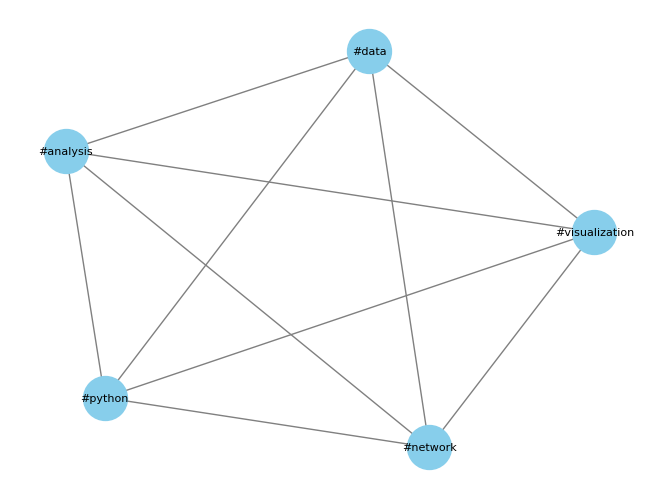

In [335]:
import networkx as nx
import matplotlib.pyplot as plt

# Example data: List of tuples where each tuple contains hashtags from a tweet
tweet_hashtags = [
    ['#data', '#visualization', '#network'],
    ['#network', '#analysis', '#python'],
    ['#data', '#python', '#analysis'],
    ['#visualization', '#python', '#network'],
    ['#data', '#analysis', '#visualization']
]

# Create a graph
G = nx.Graph()

# Add nodes and edges based on hashtag co-occurrence
for hashtags in tweet_hashtags:
    G.add_nodes_from(hashtags)
    G.add_edges_from([(hashtags[i], hashtags[j]) for i in range(len(hashtags)) for j in range(i + 1, len(hashtags))])

# Visualization
pos = nx.spring_layout(G)  # or use another layout algorithm
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1000, font_color='black', node_color='skyblue', edge_color='gray')
# plt.show()


new graph from created edges group

In [336]:
# open saved edges data file
df_edge_grouped = pd.read_csv( link_folder+'edges_weight_counted_'+str( max_data )+'.csv' )
new_graph = nx.from_pandas_edgelist( df_edge_grouped, edge_attr=True )

# check nodes and edges number from saved file
print( "nodes: ", len( new_graph.nodes ) )
print( "edges: ", len( new_graph.edges ) )

nodes:  663
edges:  1223


In [337]:
list( new_graph.nodes )[:10]

['199bn',
 'crpf',
 '1u',
 'disinfectants',
 'notmeus',
 '60minutes',
 'covid19',
 '7minutebriefing',
 'covid_19',
 'domesticabuse']

In [338]:
list( new_graph.edges( data=True ) )[:10]

[('199bn', 'crpf', {'weight': 1}),
 ('1u', 'disinfectants', {'weight': 1}),
 ('1u', 'notmeus', {'weight': 1}),
 ('1u', 'coronavirus', {'weight': 1}),
 ('1u', 'covid_19', {'weight': 1}),
 ('1u', 'disinfectant', {'weight': 1}),
 ('1u', 'resist', {'weight': 1}),
 ('1u', 'stayhome', {'weight': 1}),
 ('1u', 'ultraviolet', {'weight': 1}),
 ('disinfectants', 'coronavirus', {'weight': 1})]

C:\Users\medin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\medin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\medin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2370 (\N{DEVANAGARI VOWEL SIGN UU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\medin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2331 (\N{DEVANAGARI LETTER CHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\medin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) 

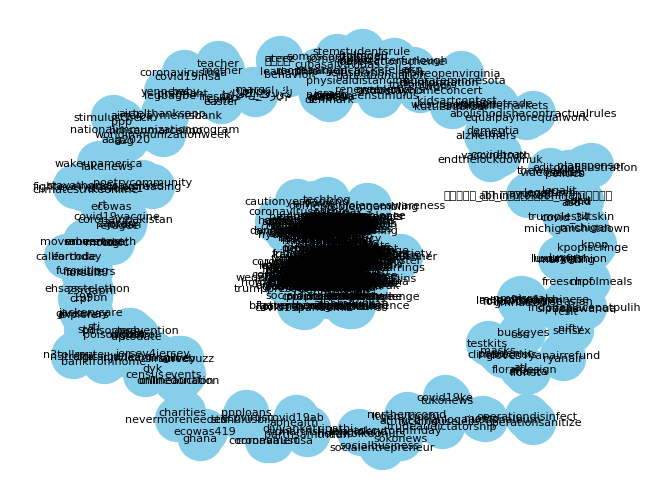

In [339]:
# Visualization
pos = nx.spring_layout( new_graph )  # or use another layout algorithm
nx.draw( new_graph, pos, with_labels=True, font_size=8, node_size=1000, font_color='black', node_color='skyblue', edge_color='gray')
plt.show()